In [9]:
# Import libraries
import pandas as pd
import cufflinks as cf

import PortfolioAnalyser as pa

# Set cufflinks offline
cf.go_offline()

Continuando o anterior post vamos fazer agora o gráfico dos ETFs com o código limpo antes de proceder

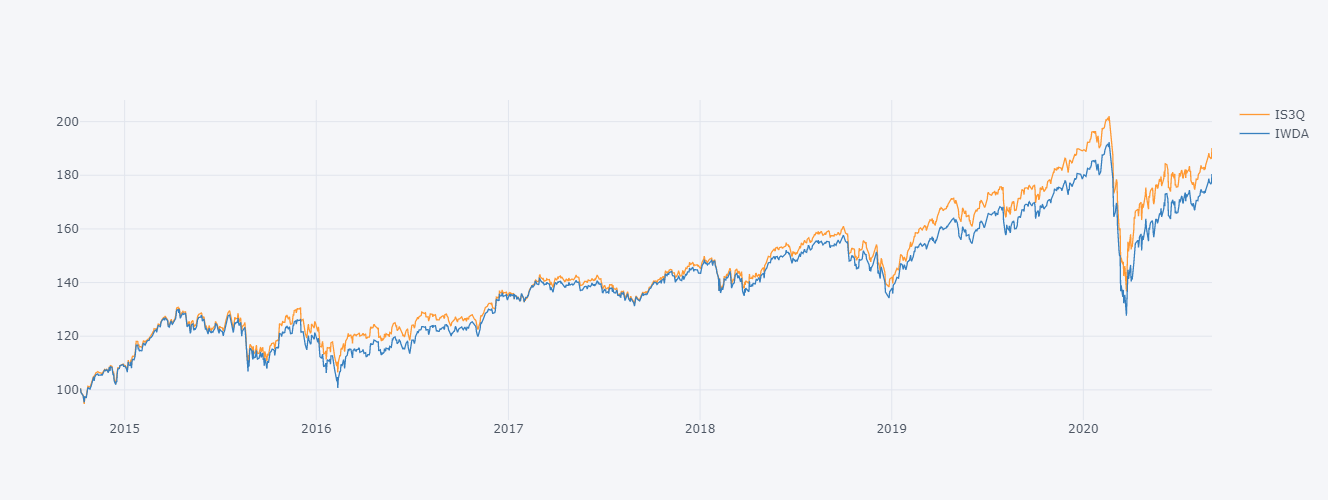

In [2]:
# Ler IS3Q, colocar index como datetime e dar o nome do ticker à coluna 
IS3Q = pd.read_csv('IS3Q.csv', index_col='Date', parse_dates=True)[['Price']]
IS3Q.columns = ['IS3Q']

# Ler IWDA, colocar index como datetime e dar o nome do ticker à coluna 
IWDA = pd.read_csv('IWDA.csv', index_col='Date', parse_dates=True)[['Price']]
IWDA.columns = ['IWDA']

# Fazer dataframe ETFs com merge dos dois ETFs
ETFs = pa.merge_time_series(IS3Q, IWDA, how='inner')
ETFs = ETFs.sort_index(ascending=True)

# Fazer o growth index
ETFs_gi = pa.compute_growth_index(ETFs)

# Fazer o gráfico plotly
ETFs_gi.iplot(dimensions=pa.dimensions)

Para fazer os drawdowns apenas temos de fazer a função para tal da biblioteca PortfolioAnalyser. Assim:

In [3]:
# Fazer DataFrame dos Drawdowns e associar a uma variável
DD = pa.compute_drawdowns(ETFs_gi)
DD

,IS3Q,IWDA
Date,,
2014-10-08,0.00,0.00
2014-10-09,0.00,0.00
2014-10-10,-1.48,-1.49
2014-10-13,-2.29,-2.31
2014-10-14,-2.55,-2.62
...,...,...
2020-08-27,-6.87,-7.07
2020-08-28,-7.50,-7.79
2020-08-31,-7.85,-8.14


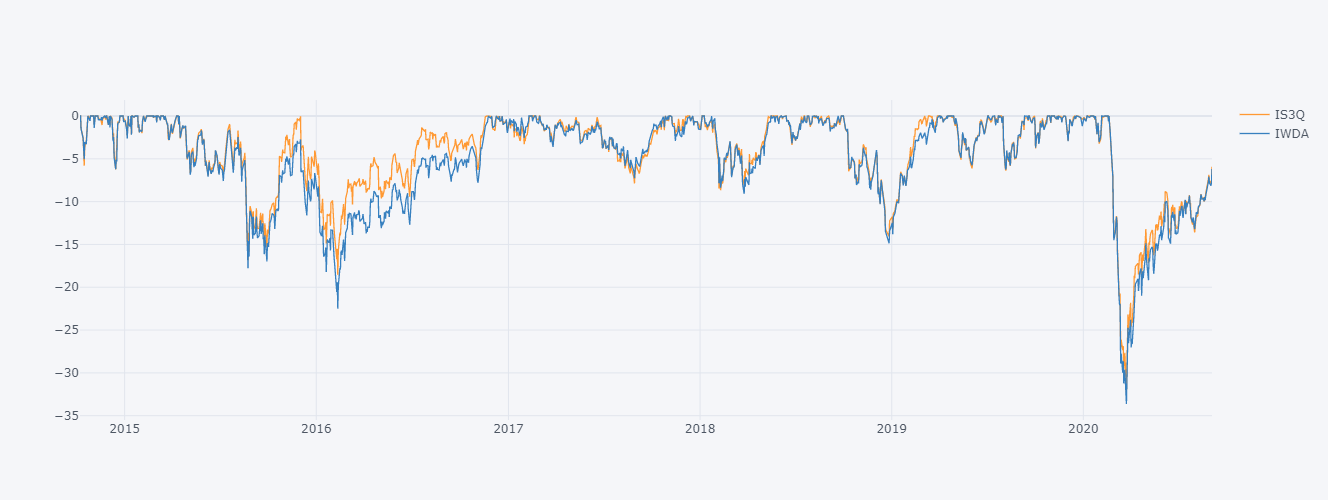

In [4]:
# Fazer o gráfico plotly
DD.iplot(dimensions=pa.dimensions)

Nada mais simples que isto. Apenas 2 linhas de código.

Vamos fazer agora a tabela de performance (não se esqueçam que têm de usar o nome da variável/DataFrame que tem ambos os ETFs):

In [5]:
# Performance since inception
pa.compute_performance_table(ETFs_gi)

**Performance from 2014-10-08 to 2020-09-02 (≈ 5.9 years)**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
IS3Q,11.48%,90.12%,17.24%,0.67,-32.30%,0.36
IWDA,10.51%,80.46%,17.54%,0.60,-33.64%,0.31


In [6]:
ETFs_gi

,IS3Q,IWDA
Date,,
2014-10-08,100.00,100.00
2014-10-09,100.56,100.44
2014-10-10,99.08,98.95
2014-10-13,98.26,98.13
2014-10-14,98.00,97.81
...,...,...
2020-08-27,188.22,178.78
2020-08-28,186.94,177.38
2020-08-31,186.23,176.72


Por defeito a tabela de performanance mostra a performance desde o início da DataFrame. Mas a função tem uma opção que se passarem o número
de anos ela vai calcular a tabela de performance desse período.

In [7]:
# Performance a 3 anos
pa.compute_performance_table(ETFs_gi, years=3)

**Performance from 2017-09-01 to 2020-09-02 (3 years)**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
IS3Q,12.08%,40.80%,17.67%,0.68,-32.30%,0.37
IWDA,10.23%,33.95%,18.03%,0.57,-33.64%,0.30


In [10]:
# Performance a 10 anos
pa.compute_performance_table(ETFs_gi, years=10)

ValueError: You seem to be selecting a date before the start of the time series